# Problem Identification

Personal financial **risk assessment is important to analyze because it allows us to reduce financial risk through effective risk management.**

Thus, this project is used to `analyze personal risk assessment` globally

The main objectives of this project is described using SMART Framework defined below.

> To reduce the occurrence of high financial risk ratings globally by 3% within 3 months, I will analyze a dataset gathered from Kaggle. This analysis will involve formulating relevant questions and creating visualizations based on the identified issues. The findings will help understand the contributing factors and provide targeted recommendations to address the high financial risk ratings.

As stated in my previous objectives, I want to analyze my dataset to answer the following questions:

1. What's the `sum of loan based on education level and risk rating`

2. What's the `average of debt-to-income ratio grouped by employment status and age group`

3. What's the `average assets based on their educational level and risk rating`

4. What's the `proportion of high financial risk rating by age group`

5. What's the `proportion of loan purposes by high financial risk rating`

6. What's the `distribution of debt-to-income ratio by financial risk rating`

7. How are the `education level and risk rating correlated?`

Based on my previous questions, I will use relevant data to support my analysis, which are:

- Loan Amount
- Debt-to-Income Ratio
- Employment Status
- Age
- Assets Value
- Education Level
- Risk Rating
- Loan Purpose

# Import Libs

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import scipy.stats as stats

# Data Loading

In this section I will load the dataset that was gathered from [kaggle](https://www.kaggle.com/datasets/preethamgouda/financial-risk) and do some simple inspections, such as:

- Inspect the dataset's overview

- Inspect dataset's summary

- Inspect dataset's column names

- Inspect unique values of multiple columns in the dataframe

In [2]:
# define const
FILE_PATH = "dataset/financial_risk_assessment.csv"

Load dataset from data source

```sql
SELECT * FROM financial_risk_assessment
```

In [3]:
# load dataset
df = pd.read_csv(FILE_PATH)
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


Insights:
- There are 15000 rows and 20 columns in the dataset
- There are some missing values on assets value and number of dependents, but there might be any on other columns as well

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [5]:
df.isna().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

## Insights & Actions

Insights:   
- There are 15,000 observations and 20 columns in the dataset.
- There are some columns containing missing values of 2,250 observations, such as: `Income`, `Credit Score`, `Loan Amount`, `Assets Value`, `Number of Dependents`

- Some columns are using inappropriate data type, this problem defined as follows:
    - Should be `categorical`:
        - Employment Status
        - Education Level
        - Risk Rating
        - Loan Purpose


Actions:
- Adjust data type of columns defined above
- Identify missing values whether the are missing not at random, missing at random, or missing completely at random

In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

Insights:

- All columns' names are clear and ready to be used for further analysis

In [7]:
# loop through columns with object data type
for col in df.select_dtypes(include="object").columns:
        print(col)
        print(df[col].unique(), end="\n\n")

Gender
['Male' 'Female' 'Non-binary']

Education Level
['PhD' "Bachelor's" "Master's" 'High School']

Marital Status
['Divorced' 'Widowed' 'Single' 'Married']

Loan Purpose
['Business' 'Auto' 'Home' 'Personal']

Employment Status
['Unemployed' 'Employed' 'Self-employed']

Payment History
['Poor' 'Fair' 'Excellent' 'Good']

City
['Port Elizabeth' 'North Catherine' 'South Scott' ... 'Susanstad'
 'South Morganchester' 'Port Wayne']

State
['AS' 'OH' 'OK' 'PR' 'IL' 'TN' 'MD' 'MA' 'DC' 'VT' 'NH' 'NM' 'IA' 'AZ'
 'MH' 'MO' 'MS' 'MP' 'DE' 'UT' 'KS' 'VI' 'CO' 'OR' 'VA' 'GA' 'ID' 'HI'
 'AL' 'TX' 'WY' 'KY' 'WA' 'RI' 'LA' 'MI' 'WV' 'ND' 'NY' 'NJ' 'CT' 'PW'
 'NV' 'FM' 'CA' 'NC' 'IN' 'GU' 'AR' 'WI' 'SD' 'MT' 'MN' 'NE' 'SC' 'ME'
 'AK' 'PA' 'FL']

Country
['Cyprus' 'Turkmenistan' 'Luxembourg' 'Uganda' 'Namibia' 'Iceland'
 'Bouvet Island (Bouvetoya)' 'Honduras' 'Pitcairn Islands' 'Thailand'
 'French Guiana' 'Antarctica (the territory South of 60 deg S)' 'Eritrea'
 'Grenada' 'Solomon Islands' 'Guadeloup

Insights:
- Gender, Eduational Level, Marital Status, Loan Purpose, Employment Status, Payment History, City, State, Country, and Risk Rating columns are categorical columns and need a data type adjustment

# Data Cleaning & Preparation

This section used to prepare and clean the dataset for further analysis

In [8]:
# create a copy of dataframe to preserve the original df
df_clean = df.copy()

## Filter Required Columns

As mentioned earlier, the columns that needed for further analysis are:
- Age
- Assets Value
- Debt-to-Income Ratio
- Education Level
- Employment Status
- Income
- Loan Amount
- Loan Purpose
- Risk Rating

```sql
SELECT 
    `Age`,
    `Assets Value`,
    `Debt-to-Income Ratio`,
    `Education Level`,
    `Employment Status`,
    `Income`,
    `Loan Amount`,
    `Loan Purpose`
    `Risk Rating`,
FROM financial_risk_assessment
```

In [9]:
# filter columns
df_clean = df_clean[[
        "Loan Amount",
        "Debt-to-Income Ratio",
        "Employment Status",
        "Age",
        "Assets Value",
        "Education Level",
        "Risk Rating",
        "Loan Purpose"
]]

df_clean.head()

,Loan Amount,Debt-to-Income Ratio,Employment Status,Age,Assets Value,Education Level,Risk Rating,Loan Purpose
0,45713.0,0.154313,Unemployed,49,120228.0,PhD,Low,Business
1,33835.0,0.148920,Employed,57,55849.0,Bachelor's,Medium,Auto
2,36623.0,0.362398,Employed,21,180700.0,Master's,Medium,Home
3,26541.0,0.454964,Unemployed,59,157319.0,Bachelor's,Medium,Personal
4,36528.0,0.143242,Unemployed,25,287140.0,Bachelor's,Low,Personal


> Successfully filter needed columns

## Create New Columns

In this section, I will create new columns to support my analysis:
- Since `I need the age to be groupped` and the dataset contains numerical age, I will `create new column called Age Group`

In [10]:
# use cut() to group age
df_clean["Age Group"] = pd.cut(
    df_clean['Age'], 
    bins=[18, 28, 38, 48, 58, 69], 
    labels=["18-28", "28-38", "38-48", "48-58", "58-69"], 
    right=False
)

In [11]:
df_clean.head()

,Loan Amount,Debt-to-Income Ratio,Employment Status,Age,Assets Value,Education Level,Risk Rating,Loan Purpose,Age Group
0,45713.0,0.154313,Unemployed,49,120228.0,PhD,Low,Business,48-58
1,33835.0,0.148920,Employed,57,55849.0,Bachelor's,Medium,Auto,48-58
2,36623.0,0.362398,Employed,21,180700.0,Master's,Medium,Home,18-28
3,26541.0,0.454964,Unemployed,59,157319.0,Bachelor's,Medium,Personal,58-69
4,36528.0,0.143242,Unemployed,25,287140.0,Bachelor's,Low,Personal,18-28


## Adjust Column Data Type

In this part, I will adjust columns' data types based on following scenarios:
- Change to `category`
   - Employment Status
    - Education Level
    - Risk Rating
    - Loan Purpose

In [12]:
# convert these columns into category
df_clean[[
    "Employment Status", 
    "Education Level", 
    "Risk Rating",
    "Loan Purpose"
]] = df_clean[[
    "Employment Status", 
    "Education Level", 
    "Risk Rating",
    "Loan Purpose"
]].astype("category")

In [13]:
# check columns' data types
df_clean.dtypes

Loan Amount              float64
Debt-to-Income Ratio     float64
Employment Status       category
Age                        int64
Assets Value             float64
Education Level         category
Risk Rating             category
Loan Purpose            category
Age Group               category
dtype: object

## Missing Value Type Identification

In this section, I will identify whether missing values in `Loan Amount` and `Income` columns can be categorized as Missing Completely at Random, Missing at Random, or Missing Not at Random.

In [14]:
def missing_freq_on_cat_col(selected_col: str, df: pd.DataFrame):
    """
    Get frequency of each categories on :selected_col inside :df

    :selected_col as str
    :df as Dataframe

    :return series of value counts
    """
    return df[selected_col].value_counts()

In [15]:
def missing_freq_on_num_col(selected_col: str, df: pd.DataFrame):
    """
    Get descriptive statistics on :selected_col inside :df

    :selected_col as str
    :df as Dataframe

    :return series of description stats
    """
    return df[selected_col].describe().map(lambda val: f'{val:,.2f}')

In [16]:
# filter rows with missing values and non missing values on loan_amount
missing_loan_amount = df_clean.loc[df_clean["Loan Amount"].isna(), df_clean.columns!="Loan Amount"]
non_missing_loan_amount = df_clean.loc[df_clean["Loan Amount"].notna(), df_clean.columns!="Loan Amount"]

In [17]:
# filter rows with missing values and non missing values on assets value
missing_assets_value = df_clean.loc[df_clean["Assets Value"].isna(), df_clean.columns!="Assets Value"]
non_missing_assets_value = df_clean.loc[df_clean["Assets Value"].notna(), df_clean.columns!="Assets Value"]

### Missing Values on Assets Value

#### Among Categorical Column

In [18]:
# loop through category columns in missing_assets_value
for col_name in missing_assets_value.select_dtypes(include="category"):
    print("Missing Values Frequency of Assets on ")
    print(missing_freq_on_cat_col(col_name, missing_assets_value), end="\n\n")

Missing Values Frequency of Assets on 
Employment Status
Employed         785
Self-employed    765
Unemployed       700
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Education Level
Master's       569
Bachelor's     565
PhD            563
High School    553
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Risk Rating
Low       1369
Medium     641
High       240
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Loan Purpose
Home        597
Personal    558
Auto        555
Business    540
Name: count, dtype: int64

Missing Values Frequency of Assets on 
Age Group
58-69    485
18-28    443
28-38    439
38-48    419
48-58    418
Name: count, dtype: int64



Insights:

As we can see that missing values frequency of `Assets Values` among all other categorical columns appear randomly. In other words I can assume that the missing values are missing completely at random

#### Among Numerical Column

##### Missing Assets Value Only


In [19]:
# loop through int or float columns inside missing_assets_value
for col_name in missing_assets_value.select_dtypes(include=["int", "float"]):
    print("Desc Stats of {} for missing values in assets values".format(col_name))
    print(missing_freq_on_num_col(col_name, missing_assets_value), end="\n\n")

Desc Stats of Loan Amount for missing values in assets values
count     1,926.00
mean     27,411.13
std      12,939.69
min       5,030.00
25%      16,028.50
50%      27,734.50
75%      38,268.50
max      49,974.00
Name: Loan Amount, dtype: object

Desc Stats of Debt-to-Income Ratio for missing values in assets values
count    2,250.00
mean         0.35
std          0.14
min          0.10
25%          0.23
50%          0.35
75%          0.48
max          0.60
Name: Debt-to-Income Ratio, dtype: object

Desc Stats of Age for missing values in assets values
count    2,250.00
mean        43.40
std         15.06
min         18.00
25%         30.00
50%         43.00
75%         57.00
max         69.00
Name: Age, dtype: object



##### Non-Missing Assets Value Only

In [20]:
# loop through numerical columns in non_missing_assets_value
for col_name in non_missing_assets_value.select_dtypes(include=["int", "float"]):
    print("Desc Stats of {} for missing values in assets values".format(col_name))
    print(missing_freq_on_num_col(col_name, non_missing_assets_value), end="\n\n")

Desc Stats of Loan Amount for missing values in assets values
count    10,824.00
mean     27,456.93
std      12,952.35
min       5,000.00
25%      16,415.00
50%      27,500.00
75%      38,575.00
max      49,998.00
Name: Loan Amount, dtype: object

Desc Stats of Debt-to-Income Ratio for missing values in assets values
count    12,750.00
mean          0.35
std           0.14
min           0.10
25%           0.23
50%           0.35
75%           0.48
max           0.60
Name: Debt-to-Income Ratio, dtype: object

Desc Stats of Age for missing values in assets values
count    12,750.00
mean         43.46
std          14.89
min          18.00
25%          31.00
50%          43.00
75%          56.00
max          69.00
Name: Age, dtype: object



Insights:

- Descriptive statistics of missing values and non-missing values in loan amount among numerical columns (`Loan Amount`, `Debt-to-Income Ratio`, `Age`) are almost similar.


- Median of Loan Amount for missing values and non-missing values in loan amount are $27,734.50 and $27,500.00 respectively. These values are identical.

- Mean of Loan Amount for missing values and non-missing values are $27,411.13 and $27,456.93 respectively.


- Median of Debt-to-Income ratio for missing values and non-missing values are both 0.35.

- Mean of Debt-to-Income ratio for missing values and non-missing values in loan amount are both 0.35.


- Median of Age for missing values and non-missing values are both 43.

- Mean of Age for missing values and non-missing values in loan amount are 43.40 and 43.46 respectively. These values are identical.


> Since the numerical column distribution in data with missing values and without missing values on assets value are very simmilar. I can conclude that the missing values is MCAR and safe to drop.

Actions:
- Drop rows with missing values on loan amount column

### Missing Values on Loan Amount

#### Among Categorical Column

In [21]:
# loop through category columns in missing_loan_column
for col_name in missing_loan_amount.select_dtypes(include="category"):
    print("Missing Values Frequency of Loan Amount on")
    print(missing_freq_on_cat_col(col_name, missing_loan_amount), end="\n\n")

Missing Values Frequency of Loan Amount on
Employment Status
Employed         760
Self-employed    753
Unemployed       737
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Education Level
High School    606
Bachelor's     568
Master's       557
PhD            519
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Risk Rating
Low       1367
Medium     650
High       233
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Loan Purpose
Business    581
Auto        568
Personal    564
Home        537
Name: count, dtype: int64

Missing Values Frequency of Loan Amount on
Age Group
18-28    480
58-69    469
28-38    425
38-48    424
48-58    398
Name: count, dtype: int64



Insights:

As we can see that missing values frequency of `Loan Amount` among all other categorical columns appear randomly. In other words I can assume that the missing values are missing completely at random

#### Among Numerical Column

##### Missing Loan Amount only

In [22]:
# loop through numerical columns inside missing_loan_amount
for col_name in missing_loan_amount.select_dtypes(include=["int", "float"]):
    print("Desc Stats of {} for missing values in loan amount".format(col_name))
    print(missing_freq_on_num_col(col_name, missing_loan_amount), end="\n\n")

Desc Stats of Debt-to-Income Ratio for missing values in loan amount
count    2,250.00
mean         0.35
std          0.14
min          0.10
25%          0.22
50%          0.34
75%          0.47
max          0.60
Name: Debt-to-Income Ratio, dtype: object

Desc Stats of Age for missing values in loan amount
count    2,250.00
mean        43.05
std         15.36
min         18.00
25%         29.00
50%         43.00
75%         56.00
max         69.00
Name: Age, dtype: object

Desc Stats of Assets Value for missing values in loan amount
count      1,926.00
mean     157,898.22
std       80,732.18
min       20,125.00
25%       86,958.25
50%      157,812.00
75%      227,595.25
max      299,870.00
Name: Assets Value, dtype: object



##### Non-Missing Loan Amount only

In [23]:
# loop through numerical columns inside non_missing_loan_amount
for col_name in non_missing_loan_amount.select_dtypes(include=["int", "float"]):
    print("Desc Stats of {} for non-missing values in loan amount".format(col_name))
    print(missing_freq_on_num_col(col_name, non_missing_loan_amount), end="\n\n")

Desc Stats of Debt-to-Income Ratio for non-missing values in loan amount
count    12,750.00
mean          0.35
std           0.14
min           0.10
25%           0.23
50%           0.35
75%           0.48
max           0.60
Name: Debt-to-Income Ratio, dtype: object

Desc Stats of Age for non-missing values in loan amount
count    12,750.00
mean         43.52
std          14.83
min          18.00
25%          31.00
50%          43.00
75%          56.00
max          69.00
Name: Age, dtype: object

Desc Stats of Assets Value for non-missing values in loan amount
count     10,824.00
mean     160,069.49
std       80,219.94
min       20,055.00
25%       91,189.25
50%      159,486.50
75%      228,985.75
max      299,999.00
Name: Assets Value, dtype: object



Insights:

- Descriptive statistics of missing values and non-missing values in loan amount among numerical columns (`Debt-to-Income Ratio`, `Age`, `Assets Value`) are almost similar.


- Median of Debt-to-Income ratio for missing values and non-missing values are 0.34 and 0.35 respectively. These values are very similar.

- Mean of Debt-to-Income ratio for missing values and non-missing values in loan amount are both 0.35. These values are identical.



- Median of Age for missing values and non-missing values are both 43. These values are identical.

- Mean of Age for missing values and non-missing values in loan amount are 43.05 and 43.52 respectively. These values are identical.



- Median of Assets Value for missing values and non-missing values in amount are $157,812.00 and $159,486.50 respectively. These values are very similar.

- Mean of Assets Value for missing values and non-missing values in loan amount is $157,898.22 and $160,069.49 respectively. These values are very similar.

> Since the numerical column distribution in data with missing values and without missing values on loan amount are very simmilar. I can conclude that the missing values is MCAR and safe to drop.

Actions:
- Drop rows with missing values on loan amount column

## Dropping Missing Values

Since all missing values in `Income` and `Loan Amount` are MCAR. I can delete all rows with missing values safely

In [24]:
# drop any rows with missing values
df_clean = df_clean.dropna()

In [25]:
# missing values inspection for each column
df_clean.isna().sum()

Loan Amount             0
Debt-to-Income Ratio    0
Employment Status       0
Age                     0
Assets Value            0
Education Level         0
Risk Rating             0
Loan Purpose            0
Age Group               0
dtype: int64

> All missing values are droped successfully

# Analysis

In this sections I will create analysis to answer my questions thruogh visualizations.

1. What's the `sum of loan based on education level and risk rating`

2. What's the `average of debt-to-income ratio grouped by employment status and age group`

3. What's the `average assets based on their educational level and risk rating`

4. What's the `proportion of high financial risk rating by age group`

5. What's the `proportion of loan purposes by high financial risk rating`

6. What's the `distribution of debt-to-income ratio by financial risk rating`

7. How are the education level and risk rating correlated?

## SUM of loan based on education level and risk rating

In [26]:
# find sum of loan amount by education level and risk rating
df_clean.groupby(["Education Level", "Risk Rating"], observed=True).agg({"Loan Amount": "sum"})

Loan Amount
Education Level Risk Rating             
Bachelor's      High           6537392.0
                Low           45906150.0
                Medium        22381747.0
High School     High           7375243.0
                Low           42133501.0
                Medium        22513551.0
Master's        High           7008151.0
                Low           42400081.0
                Medium        21215392.0
PhD             High           8369152.0
                Low           43585073.0
                Medium        22681815.0

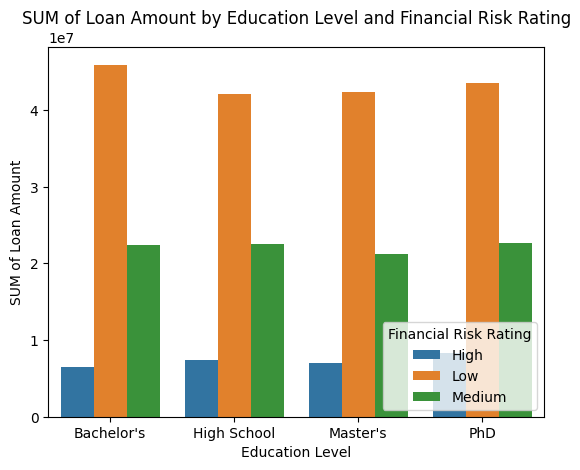

In [27]:
# barplot with title and custom y label and legend
sns.barplot(
    df_clean, 
    x="Education Level", 
    y="Loan Amount",
    hue="Risk Rating",
    estimator="sum",
    errorbar=None
)

plt.title("SUM of Loan Amount by Education Level and Financial Risk Rating")
plt.ylabel("SUM of Loan Amount")
plt.legend(loc="lower right", title="Financial Risk Rating")
plt.show()

Insights:   
- **Among all Education Levels, highest loan in total are considered as low financial risk rating.**
- Lowest sum of loan in total, precisely having high financial risk rating.
- This might be because **people with high amount of loan able to manage their financial and generate more revenue with it.**

## AVG of Debt-to-Income Ratio by Employment Status and Age Group

In [28]:
# find debt to income ration by employment status and age group
df_clean.groupby(["Employment Status", "Age Group"], observed=True).agg({"Debt-to-Income Ratio": "mean"})

Debt-to-Income Ratio
Employment Status Age Group                      
Employed          18-28                  0.343091
                  28-38                  0.353440
                  38-48                  0.348516
                  48-58                  0.361765
                  58-69                  0.344728
Self-employed     18-28                  0.363206
                  28-38                  0.357046
                  38-48                  0.340509
                  48-58                  0.347446
                  58-69                  0.343831
Unemployed        18-28                  0.344451
                  28-38                  0.355054
                  38-48                  0.352974
                  48-58                  0.352528
                  58-69                  0.360324

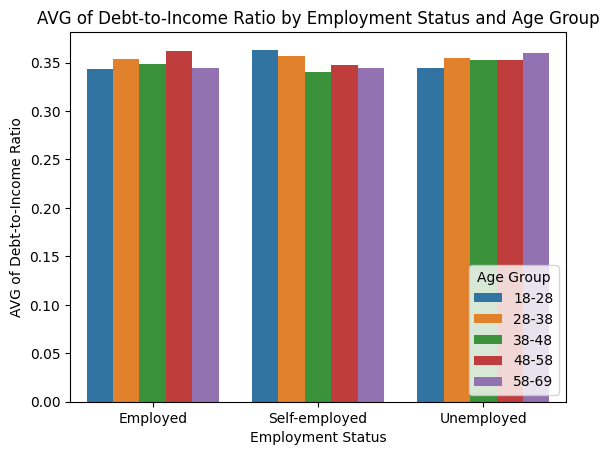

In [29]:
# barplot with title and custom y label and legend
sns.barplot(
    df_clean, 
    x="Employment Status", 
    y="Debt-to-Income Ratio",
    hue="Age Group",
    estimator="mean",
    errorbar=None
)

plt.title("AVG of Debt-to-Income Ratio by Employment Status and Age Group")
plt.ylabel("AVG of Debt-to-Income Ratio")
plt.legend(loc="lower right", title="Age Group")
plt.show()

Insights:   
- Average of Debt-to-Income ratio (DTI) for each employment status and grouped by age group seem similar.
- Age group of 18-28 for self-employed are having the highest DTI on the group, but not significanly compared to others
- Employed people within range of age 48-58 are having highest DTI, also not significanly compared to others
- Based on the visualization **I conclude that Age and Employment Status don't have any correlation to DTI.**

In [30]:
df_clean.columns

Index(['Loan Amount', 'Debt-to-Income Ratio', 'Employment Status', 'Age',
       'Assets Value', 'Education Level', 'Risk Rating', 'Loan Purpose',
       'Age Group'],
      dtype='object')

## AVG of assets based on their educational level and risk rating

In [33]:
# find sum of assets value by education level and risk rating
df_clean.groupby(["Education Level", "Risk Rating"], observed=True).agg({"Assets Value": "sum"})

Assets Value
Education Level Risk Rating              
Bachelor's      High           38584272.0
                Low           259551700.0
                Medium        135126940.0
High School     High           41949995.0
                Low           250709510.0
                Medium        132778167.0
Master's        High           39664593.0
                Low           251695930.0
                Medium        120286820.0
PhD             High           48037969.0
                Low           254659454.0
                Medium        127727433.0

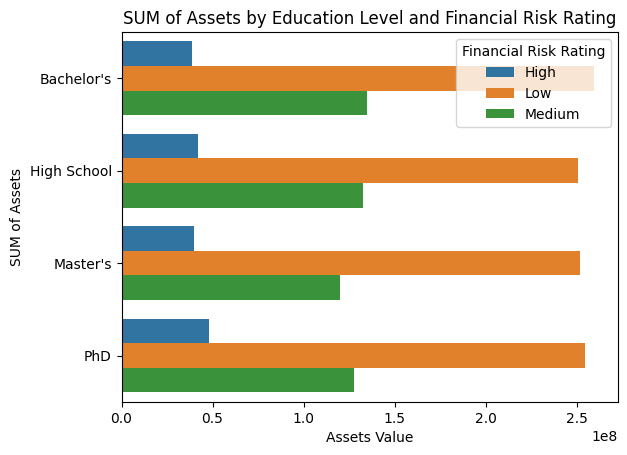

In [34]:
# show barplot with label and custom ylabel & legend
sns.barplot(
    df_clean,
    y="Education Level",
    x="Assets Value",
    orient="h",
    hue="Risk Rating",
    estimator="sum",
    errorbar=None
)

plt.title("SUM of Assets by Education Level and Financial Risk Rating")
plt.ylabel("SUM of Assets")
plt.legend(loc="upper right", title="Financial Risk Rating")
plt.show()

Insights:
- The graph shown that people with highet assets are having low financial risk rating.
- People with lowest assets are having high financial risk rating.

## Proportion of High Financial Risk Rating by Age Group

In [35]:
# filter high risk rating only and get age group column
prop_high_fin_risk_by_age_group = df_clean.loc[df_clean["Risk Rating"]=="High", "Age Group"].value_counts(normalize=True)
prop_high_fin_risk_by_age_group

Age Group
58-69    0.226397
28-38    0.207129
38-48    0.207129
48-58    0.182081
18-28    0.177264
Name: proportion, dtype: float64

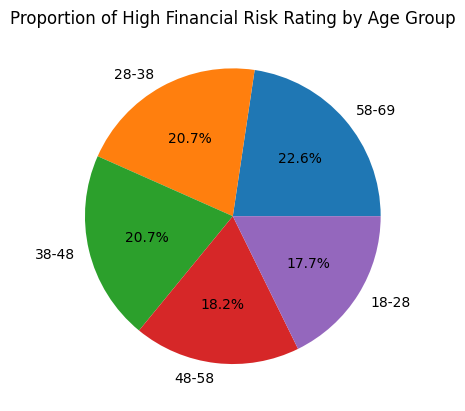

In [36]:
# show pie plot with title
plt.pie(prop_high_fin_risk_by_age_group, labels=prop_high_fin_risk_by_age_group.keys(), autopct='%.1f%%')

plt.title("Proportion of High Financial Risk Rating by Age Group")
plt.show()

Insights: 
- Age group 58-69 is the highest proportion of high financial risk rating by 22.64%.
- The proportion of high financial risk rating among all age group is very similar.
- In conclution, the graph shown that **age doesn't have correlation with financial risk, since the proportions are almost identical**

## Proportion of Loan Purposes by High Financial Risk Rating

In [37]:
# filter high risk rating only and ge loan purpose column
prop_loan_purpose_by_high_fin_rating = df_clean.loc[df_clean["Risk Rating"]=="High", "Loan Purpose"].value_counts(normalize=True)
prop_loan_purpose_by_high_fin_rating

Loan Purpose
Auto        0.277457
Personal    0.263969
Home        0.251445
Business    0.207129
Name: proportion, dtype: float64

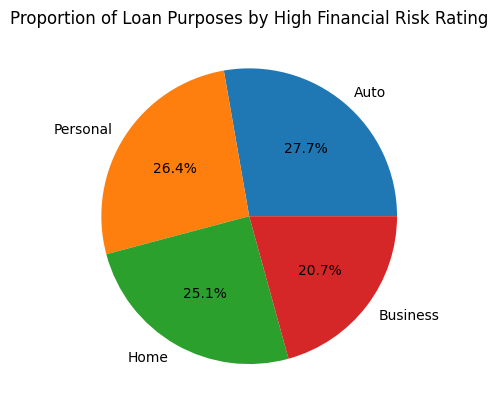

In [38]:
# show pie plot with title
plt.pie(
    prop_loan_purpose_by_high_fin_rating, 
    labels=prop_loan_purpose_by_high_fin_rating.keys(), 
    autopct='%.1f%%'
)

plt.title("Proportion of Loan Purposes by High Financial Risk Rating")
plt.show()

Insights: 
- `Auto is the highest loan purpose from high financial risk rating` followed by personal and home.
- Proportion of loan purposes with high financial risk rating are almost equal.
- `All loan purposes have almost equal impact on High Financial Risk Rating`
- Hence, I conclude that **there's no assosiation between these variables**

## Debt-to-Income Ratio Distribution among Education Level

<Axes: xlabel='Employment Status', ylabel='Debt-to-Income Ratio'>

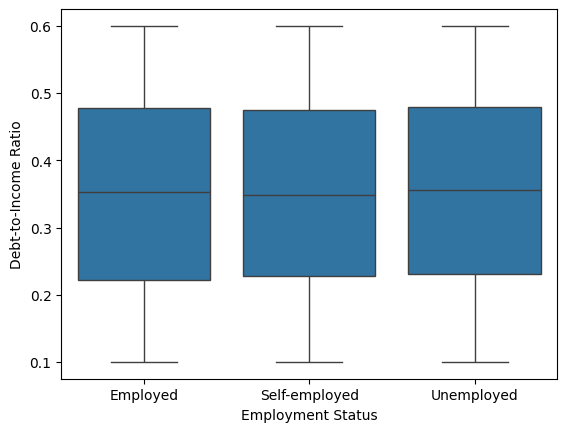

In [32]:
sns.boxplot(
    df_clean, 
    x="Employment Status",
    y="Debt-to-Income Ratio"
)

Insights:
- DTI distributions among Employment Status are also exactly the same.
- Thus, **Employment Status and DTI don't have any assosiations**

## Debt-to-income Ratio Distribution by Financial Risk Rating

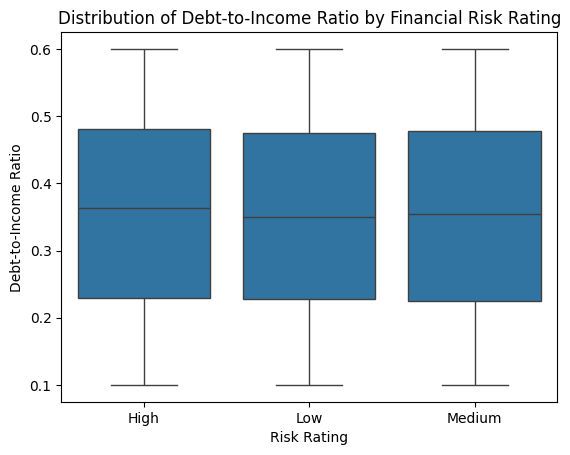

In [39]:
# show boxplot of debt-to-income ratio on each risk rating with title
sns.boxplot(data=df_clean, x="Risk Rating", y="Debt-to-Income Ratio")
plt.title("Distribution of Debt-to-Income Ratio by Financial Risk Rating")
plt.show()

Insights:
- Data distribution of Debt-to-Income ratio among all Risk Rating categories are equal
- Hence, **there is no association between the Debt-to-Income ratio and Risk Rating categories**

## Debt-to-Income Ratio Distribution among Employment Status

<Axes: xlabel='Education Level', ylabel='Debt-to-Income Ratio'>

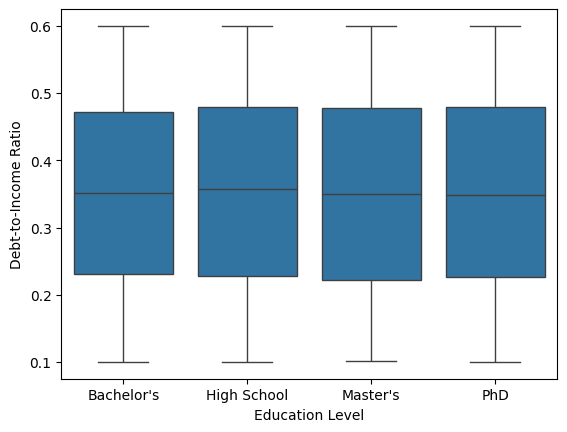

In [31]:
sns.boxplot(
    df_clean, 
    x="Education Level",
    y="Debt-to-Income Ratio"
)

Insights:
- DTI distributions among education level are exactly the same
- Therefore, Education Level doesn't have assosiations with DTI

## srtsrt

In [51]:
df_clean.columns

Index(['Loan Amount', 'Debt-to-Income Ratio', 'Employment Status', 'Age',
       'Assets Value', 'Education Level', 'Risk Rating', 'Loan Purpose',
       'Age Group'],
      dtype='object')

In [ ]:
df_clean[""]

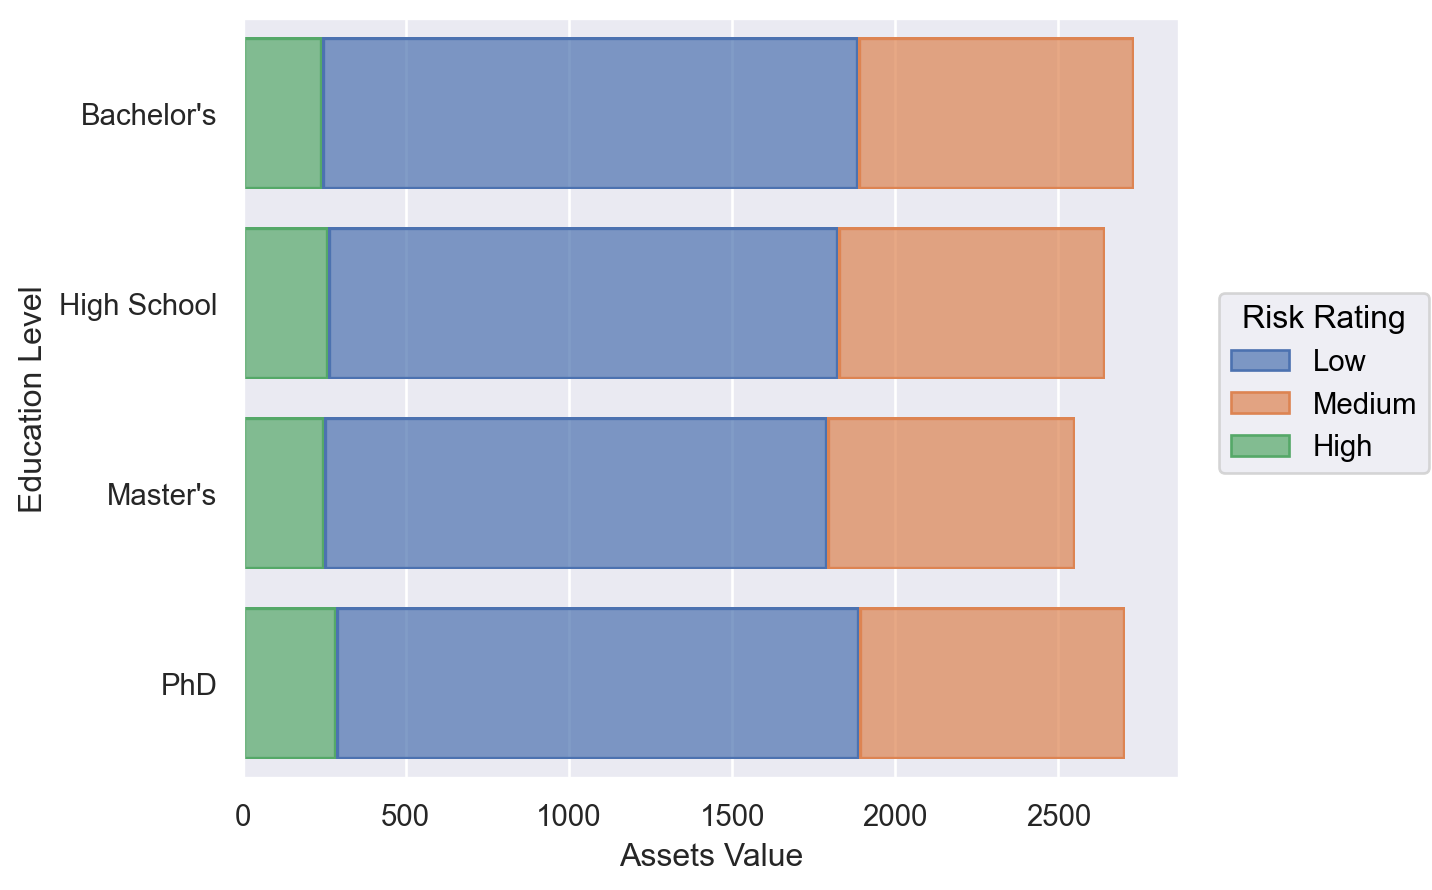

In [50]:
# show barplot with label and custom ylabel & legend
(
    so.Plot(
        df_clean,
        y="Education Level",
        x="Assets Value",
        color="Risk Rating",
    ).add(so.Bar(), so.Count(), so.Stack())
)

## How are the education level and risk rating correlated?

I will answer the question by conducting hypothesis testing stated below.
- H0: There's no correlation between education level and risk rating (The variables are independent)
- H1: Education level and risk rating are correlated to each other (The variables are not independent)

In [40]:
# crosstab on education level and risk rating
education_level_vs_risk_rating = pd.crosstab(df_clean["Education Level"], df_clean["Risk Rating"])
education_level_vs_risk_rating

Risk Rating,High,Low,Medium
Education Level,,,
Bachelor's,244,1643,846
High School,260,1564,819
Master's,248,1542,762
PhD,286,1603,816


In [41]:
# chi squared test
"Pval: {:.2f}".format(stats.chi2_contingency(education_level_vs_risk_rating).pvalue)

'Pval: 0.53'

Insights:
- Since the p-value is greater that critical value (0.53 > 0.05), the hypothesis test shown that H0 is fail to rejected.

- Which means that **there's no significant evidence that education level and risk rating are having an assosiation**

# Conclutions

- People who have **high total loan amount and assets tend to have a low financial risk rating.**
- The Debt-to-Income Ratio (DTI) is almost identical across all age groups, regardless of whether individuals are unemployed, self-employed, or employed.
- All loan purposes are having nearly identical proportion on High Financial Risk Rating
- All Age groups categories are also having nearly identical proportion on Financial Risk Ratings categories
- **There's no assotiations between DTI and Financial Risk Ratings categories**
- **There's no significant assotiations between Education Level and Financial Risk Rating**

> Individuals needs to increase their total assets and learn to manage their loan, so they can generate more revenue which can lead to decrease their financial risk rating.

# Export Clean Data

In [42]:
# export cleaned dataset into .csv format
# df_clean.to_csv("dataset/clean_financial_risk_assesment.csv", index=False)